#Informe 9: Algoritmo de Orden Topológico.

##Descripción del Problema:
Un grafo es un conjunto de nodos o vértices que se encuentran unidos por enlaces llamados aristas o arcos, los cuales permiten relaciones binarias entre los elementos de este conjunto. Esta estructura sirve para representar información y resolver distintos problemas, como lo es en este caso, el problema del orden topológico.

El ordenamiento topológico es utilizado para encontrar un orden secuencial dentro de un conjunto de tareas. Aquella secuencia debe cumplir con todas las restricciones de precedencia que contengan los elementos a ordenar. Para representar este orden en un grafo, se debe utilizar un grafo acíclico y dirigido $G$ que tenga $V$ nodos y $E$ arcos. Los datos deben estar ordenados de tal manera que al asignar un valor $f(v)$ a cada nodo $v$ en $V$, al acceder a un arco $(v, w)$, se observe que $f(v) < f(w)$.

---

#### **Entradas y Salidas:**

**Entrada**: Grafo dirigido sin ciclos $G=(V,E)$.

**Salida:** Un orden topológico de los vértices de $G$. Es decir, una asignación $f(v)$ a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v)<f(w)$.

##Descripción del Algoritmo:

---
###¿Cómo se obtiene el algoritmo?

Para encontrar un algoritmo que pueda encontrar un orden topológico según los datos de entrada entregados, se debe efectuar un análisis al comportamiento del "DAG" (Directed Acyclic Graph, o grafo acíclico dirigido en inglés):

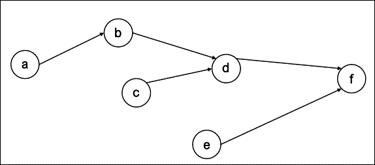

Según el orden topológico y esta ilustración, existen varios vértices que tienen predecesores, por ende, es estos nodos no pueden ir antes que su antecesor dentro del orden final. A raíz de lo anterior, se irán recorriendo los arcos de los vértices que no tengan predecesor, eliminando estos a medida ya se hayan recorrido.

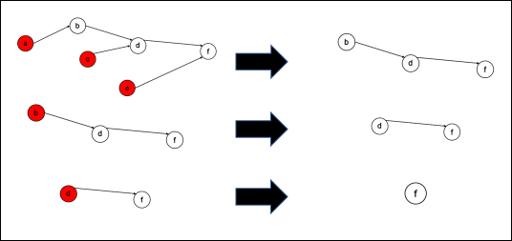

A partir de la ilustración anterior, se puede llegar a la conclusión de que si se recorre el grafo usando los arcos disponibles, poco a poco se pasará por todos los nodos de la estructura, respetado las restricciones de cada vértice. Por lo tanto, es esta lógica la que se utilizará para generar un algoritmo.

---
###Pasos a seguir:

Para conseguir una lista de salida con algún orden topológico, se pueden seguir los siguientes pasos:

- Crear un lista de ordenamiento y asignarle un valor (clave) a cada nodo del grafo si es que no lo tienen.
- Elegir un nodo cualquiera del grafo.
- Visitar los hijos del nodo, si estos tienen arcos que apunten a otros hijos volver a recorrer. 
  - Mientras se realiza este paso, se debe "agregar" la clave de cada vértice a la lista de ordenamiento.
  - También durante este paso, se debe "Marcar" cada nodo como "visitado".
-  Cuando se llegue al final, o sea, un nodo sin sucesores, se considera a todos los nodos recorridos como "eliminados" y se vuelve a elegir un nodo cualquiera para repetir el procedimiento.
- Cuando ya no queden nodos por visitar, la lista de ordenamiento tendrá un orden topológico invertido, por lo que se debe reordenar la lista para tner el orden válido.

---
###Utilización de DFS:

Como se dió a entender en el punto anterior, el algoritmo de orden topológico debe contener en su implementación una forma de recorrer los nodos de un grafo de forma de pasar por todos los hijos y además tener la capacidad de marcarlos como "visitados" y agregarlos a una lista. A raíz de este "sub-problema", es que se puede utilizar un algoritmo auxiliar, como lo es en este caso, el algoritmo de búsqueda en profundidad (DFS, Deep First Search).

Cabe destacar que el DFS a utilizar debe ser uno que recorra el grafo como lo pide el problema principal, eso quiere decir, primero se visitan los hijos, y luego los padres. Es en este sentido, que se utilizará la versión Post-Orden (recorrido) del DFS para este algortimo.

---
###Ejemplo de Ejecución:
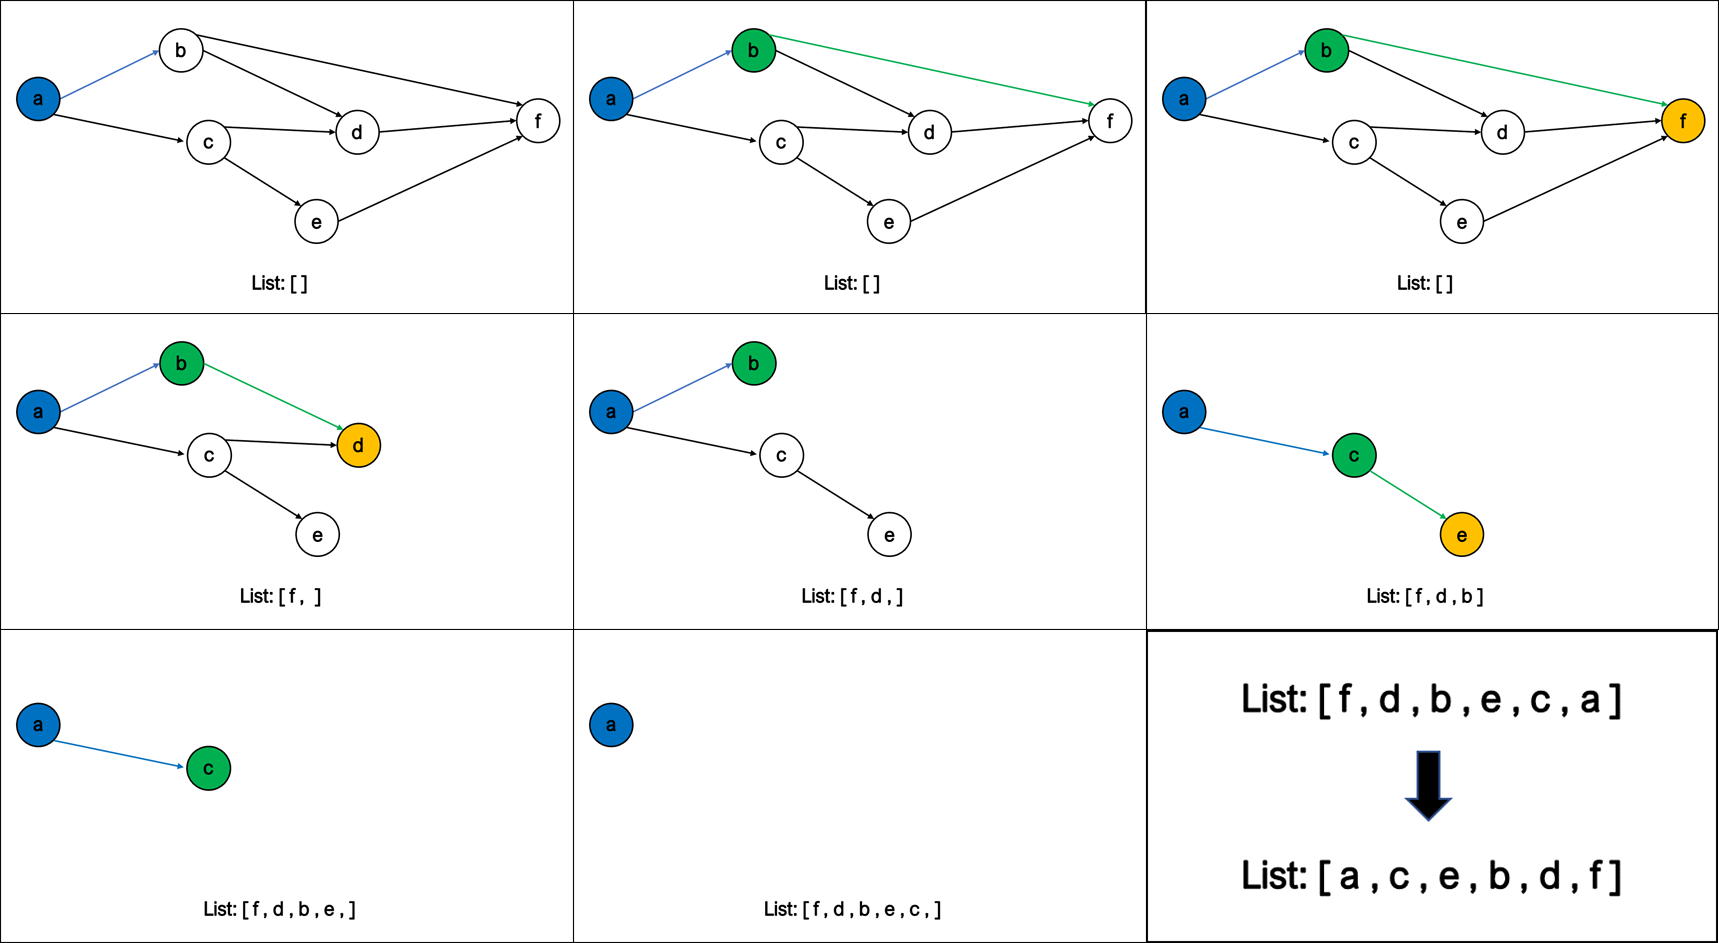

##3.Implementación del algoritmo.

A continuación se presentarán dos implementaciones del algoritmo de orden topológico, entre ambas sólo varía la aplicación del DFS:

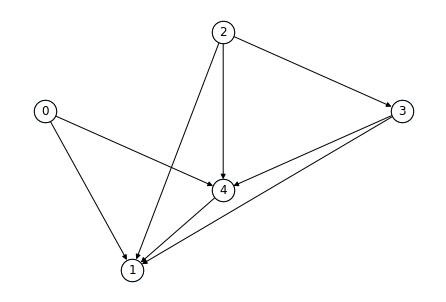

In [359]:
# @title Crear un grafo para ordenar.
from collections import defaultdict
import math
import random
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

#Pasar un grafo normal, a uno dirigido
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

def crearGrafo (visualize, n):
  #Crear un grafo no dirigido de 5 nodos
  T = graph_instance_creator(n)
  #Convertir el grafo en uno dirigido
  T = graph_to_nxdigraph(T)
  #Colocarle claves a los nodos del grafo
  labels={}
  for n in T:
    if "label" in T.nodes[n]: labels[n]=T.nodes[n]["label"]
  # Cambiamos la etiqueta de los nodos
  T = nx.relabel_nodes(T, labels, copy=True)
  if (visualize == True):
    dibujarGrafo(T)
  return T

def dibujarGrafo (T):
  #Calcular Posiciones de los nodos
  pos = graphviz_layout(T, prog="dot")
  #Dibujar el grafo
  nx.draw(T,pos, with_labels=True, node_size=500)
  nodes = nx.draw_networkx_nodes(T, pos, node_size=500, node_color="white")
  nodes.set_edgecolor('black')


#Crear un grafo
T = crearGrafo(True, 5)

---> Crear la lista que almacenará los nodos en orden topológico: []
---> Crear una lista auxiliar: []
------------ DFS ------------
Nodo visitado: 0
Nodo visitado: 1
¡Nodo 1 agregado a la lista auxiliar!
Nodo visitado: 4
¡Nodo 4 agregado a la lista auxiliar!
¡Nodo 0 agregado a la lista auxiliar!
-----------------------------
---> Traspasar nodos de la lista auxiliar a la lista de orden:
Lista Auxiliar: [1, 4, 0]
Lista de Orden: [] + [1, 4, 0] = [1, 4, 0]
---> ¡Se eliminaron todos los nodos presenten en la lista auxiliar!
---> Buscar otro valor initial para reiniciar el ciclo:
Valor Initial Actual: 0
Valor Initial Nuevo: 3
------------ DFS ------------
Nodo visitado: 3
¡Nodo 3 agregado a la lista auxiliar!
-----------------------------
---> Traspasar nodos de la lista auxiliar a la lista de orden:
Lista Auxiliar: [3]
Lista de Orden: [1, 4, 0] + [3] = [1, 4, 0, 3]
---> ¡Se eliminaron todos los nodos presenten en la lista auxiliar!
---> Buscar otro valor initial para reiniciar el ciclo:


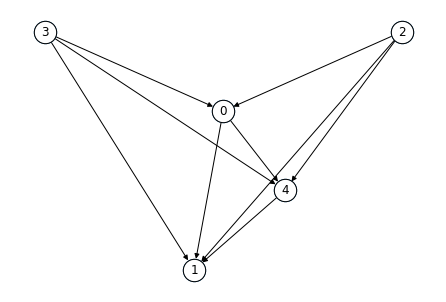

In [360]:
#@title Implementación con DFS iterativo:
from termcolor import cprint

def eliminateNodes (T, order):
  #Eliminar los nodos ya añadidos a la lista
  for n in order:
    T.remove_node(n)
  return T

def setInitial (T):
  nodeList = list(T.nodes)
  initial = nodeList[0]
  return initial

def traspasarNodos (order, aux):
  for i in range (len(aux)):
    order.append(aux[i])

def dfs(T, initial, order, verbose):
   #Crear un estado para cada nodo.
   state = dict()
   for n in T: state[n]="no descubierto"

   Q=[initial]

   while len(Q)>0:
     n=Q.pop()
     if state[n]=="no descubierto": #primera pasada
       state[n]="descubierto"
       Q.append(n)
       if (verbose == True):
         cprint(f"Nodo visitado: {n}", "yellow", end='\n')
       for adj in reversed(list(T[n])):
         if state[adj]== "no descubierto": Q.append(adj)
     elif state[n]=="descubierto": #segunda pasada
       state[n] ="visitado"
       if (verbose == True):
         cprint(f"¡Nodo {n} agregado a la lista auxiliar!", "yellow", attrs=['bold'])
       order.append(n)

def TopologicalOrder (T, initial, visualize, verbose):
  #Lista para el orden topológico.
  order = list()
  auxOrder = list()
  if verbose == True:
    cprint("---> Crear la lista que almacenará los nodos en orden topológico:", "white", end=' ')
    cprint(f"{order}", "white", attrs=['bold'])
    cprint("---> Crear una lista auxiliar:", "white", end=' ')
    cprint(f"{auxOrder}", "white", attrs=['bold'])
  
  #Realizar búsquedas mientras hayan nodos en el grafo.
  while (T.number_of_nodes() > 0):
    if verbose == True:
      cprint("------------ DFS ------------", "yellow", end='\n')
    dfs(T, initial, auxOrder, verbose)
    if verbose == True:
      cprint("-----------------------------", "yellow", end='\n')
    #Traspasar los nodos encontrados a la lista de orden.
    if verbose == True:
      cprint("---> Traspasar nodos de la lista auxiliar a la lista de orden:", "blue", end='\n')
      cprint(f"Lista Auxiliar: {auxOrder}", "blue")
      cprint(f"Lista de Orden: {order[0:len(order)]}", "blue", attrs=['bold'], end= '')
      cprint(f" + {auxOrder[0:len(auxOrder)]}", "blue", attrs=['bold'], end='')
    traspasarNodos(order,auxOrder)
    if verbose == True:
      cprint(f" = {order}", "blue", attrs=['bold'], end= '\n')
    #Eliminar los nodos ya visitados
    T = eliminateNodes(T, auxOrder)
    if verbose == True:
      cprint("---> ¡Se eliminaron todos los nodos presenten en la lista auxiliar!", "red", end='\n')
    if (T.number_of_nodes() == 0):
      break
    #Establecer otro valor inicial para la siguiente iteración
    if verbose == True:
      cprint("---> Buscar otro valor initial para reiniciar el ciclo:", "green", end='\n')
      cprint(f"Valor Initial Actual: {initial}", "green", attrs=['bold'])
    initial = setInitial(T)
    if verbose == True:
      cprint(f"Valor Initial Nuevo: {initial}", "green", attrs=['bold'])
    auxOrder.clear()

  #Invertir el orden de la lista
  if verbose == True:
    cprint("---> Invertir el orden de la lista:", "white", end='\n')
    cprint(f"{order}", "white", attrs=['bold'], end=' ')
    cprint(f"---> {order[::-1]}", "white", attrs=['bold'])
    cprint("---> Orden Topológico Obtenido:", "white", end=' ')
    cprint(f"{order[::-1]}", "white", attrs=['bold'])
  order = order[::-1]

  if (visualize == True):
    cprint("\n--------- Grafo ---------")
    dibujarGrafo(T)

#Ejemplo
T = crearGrafo(True, 5)
order = TopologicalOrder(T, 0, visualize = True, verbose = True)

---> Iniciar DFS
¡El nodo 1 no está visitado!
Se marcó el nodo 1 como visitado
---> Recorrer el camino del nodo 1...
¡El nodo 4 no está visitado!
Se marcó el nodo 4 como visitado
---> Recorrer el camino del nodo 4...
¡El nodo 0 no está visitado!
Se marcó el nodo 0 como visitado
---> Recorrer el camino del nodo 0...
Agregar el nodo 0 a la lista order
Agregar el nodo 4 a la lista order
Agregar el nodo 1 a la lista order
¡El nodo 2 no está visitado!
Se marcó el nodo 2 como visitado
---> Recorrer el camino del nodo 2...
¡El nodo 3 no está visitado!
Se marcó el nodo 3 como visitado
---> Recorrer el camino del nodo 3...
Agregar el nodo 3 a la lista order
Agregar el nodo 2 a la lista order
---> Finaliza DFS

---> Invertir el orden de la lista:
[2, 3, 1, 4, 0] ---> [0, 4, 1, 3, 2]
---> Orden Topológico Obtenido: [0, 4, 1, 3, 2]

--------- Grafo ---------


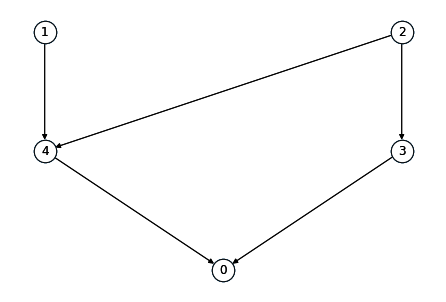

In [398]:
#@title Implementación con DFS recursivo:
from termcolor import cprint

def dfsRecursion(T, node, auxVisit, order, verbose):
  #Visitar el nodo
  auxVisit[node] = True
  if verbose == True:
    cprint(f"Se marcó el nodo {node} como visitado", "green", attrs=['bold'], end='\n')
    cprint(f"---> Recorrer el camino del nodo {node}...", "green", end='\n')

  #Recorrer los valores del nodo
  for i in T[node]:
    if auxVisit[i] == False:
      if verbose == True:
        cprint(f"¡El nodo {i} no está visitado!", "green", end='\n')
      dfsRecursion(T, i, auxVisit, order, verbose)

  #Añadir a la lista el nodo visitado.
  if verbose == True:
    cprint(f"Agregar el nodo {node} a la lista order", "white", attrs=['bold'], end='\n')
  order.append(node)


def dfsMain(T, verbose):
  #Declarar una lista que marca si los elementos están visitados
  auxVisit = [False]*len(T)
  #Arreglo con el orden Topológico
  order = []
  #Recorrer cada nodo
  for n in T:
    #Preguntar si esta visitado
    if auxVisit[n] == False:
      if verbose == True:
        cprint(f"¡El nodo {n} no está visitado!", "blue", end='\n')
      dfsRecursion(T, n, auxVisit, order, verbose)

  return order[::-1]

def TopologicalOrderRecursive(T, verbose, visualize):
  #Utilizar el DFS.
  if verbose == True:
      cprint("---> Iniciar DFS", "yellow", end='\n')
  order = dfsMain(T, verbose)
  if verbose == True:
      cprint("---> Finaliza DFS", "yellow", end='\n')

  #Invertir el orden de la lista
  if verbose == True:
    cprint("\n---> Invertir el orden de la lista:", "white", end='\n')
    cprint(f"{order}", "white", attrs=['bold'], end=' ')
    cprint(f"---> {order[::-1]}", "white", attrs=['bold'])
    cprint("---> Orden Topológico Obtenido:", "white", end=' ')
    cprint(f"{order[::-1]}", "white", attrs=['bold'])

  #Mostrar grafo a trabajar
  if visualize == True:
    cprint("\n--------- Grafo ---------")
    dibujarGrafo(T)

#Ejemplo
T = crearGrafo(True, 5)
order = TopologicalOrderRecursive(T, verbose = True, visualize = True)

##4. Correctitud:

Para demostrar que el algoritmo es correcto debemos tener en cuenta la siguiente restricción: “Para encontrar el orden topológico de un grafo dirigido, este debe ser acíclico” o mejor dicho, que no posea ciclos.
¿Como podemos demostrar que un grafo dirigido es acíclico? Primero vamos a plantear una hipótesis.

**Hipótesis:**  *Si un grafo es dirigido y acíclico entonces debería existir un orden topológico.*

Se intentará validar dicha hipótesis mediante el siguiente teorema.

**Teorema:** *Cualquier grafo dirigido sin ciclos tiene al menos un orden topológico.*

Para demostrar dicho teorema se deben considerar el siguiente lema.

**Lema 1:** *Todo DAG (Grafo acíclico dirigido) tiene un origen.*

El lema 1 se puede demostrar al escoger un vértice arbitrario de un grafo acíclico dirigido y recorrerlo hacia el origen. Si es acíclico llegaremos a un vértice origen.

El teorema se demuestra pensando en la idea de crear un orden topológico de izquierda a derecha tomando un vértice origen.

**Prueba del teorema:**

Sea un grafo G acíclico dirigido con ‘n’ vértices. Se debe asignar valores $f$ a los vértices de forma creciente de 1 hasta $n$. Al dejar un vértice $‘v_1’ $ como vértice origen, nos aseguramos que el ordenamiento no se realizara en otro sentido, por ende, es obligatorio escoger un vértice origen para asignar valor a $f$.

Gracias al lema 1, nos asegura la existencia de G, entonces a su vértice $‘v_1’ $ se le asigna el valor f(v_1) = 1. Si ocupamos recursividad, podemos generar un grafo $G_0$ al eliminar el vértice $‘v_1’$, dando que los vértices que se pueden marcar partiendo de 2 hasta n y como G es acíclico dirigido, condena a que G0 también lo sea, puesto que eliminar cosas no crea ciclos nuevos entonces queda comprobado que $G_0$ es acíclico dirigido. Al ir reduciendo el grafo por recursión se puede crear el orden topológico eliminando vértices.

Ahora que demostramos que todo grafo dirigido acíclico posee orden topológico se debe demostrar que el algoritmo encuentra dicho orden, con ello se debe preguntar: ¿Es posible encontrar un orden topológico para un grafo dirigido acíclico mediante un algoritmo?, a dicha pregunta se da la siguiente hipótesis.

**Hipótesis:** *Existe un algoritmo que permite encontrar el orden topológico de un grafo dirigido acíclico.*

Para esto se determina el siguiente teorema.

**Teorema:** El algoritmo para encontrar un orden topológico de un grafo dirigido acíclico retorna una secuencia de los elementos con cierto orden.

Mediante inducción probaremos que el algoritmo es correcto.

Sea $P(1)$ el caso base donde el grafo posee un único elemento, se puede considerar su orden topológico como el mismo elemento sin otra opción posible, en caso de tener un grafo con dos nodos y un arco se podría considerar también como un caso base el nodo origen y luego el siguiente nodo.
Dado que el algoritmo se implementa mediante BFS en Post-orden, tenemos un recorrido de final a inicio, esto debemos tenerlo en consideración para explicar el siguiente paso.

Para $P(m)$ casos con m < n, se puede considerar que el algoritmo asignará un favor $f$ a un nodo $’v’$ desde $m$ hasta 1, por ende, se tendrá un orden de recorrido para el grafo $G_0$, a medida que se va visitando y asignando valores al grafo, el algoritmo va guardando el orden topológico encontrado desde el ultimo nodo que iría en dicho orden hasta el nodo m, por lo tanto, obtenemos un orden que va de fin a inicio mientras se visitan los nodos.

Como el grafo $G_0$ es dirigido y acíclico completará su recorrido a los $n$ nodos, dando que se encontrará un orden topológico para el grafo $G$, por lo que se demuestra que el algoritmo es correcto.

##5. Tiempo de Ejecución:

Para encontrar el tiempo de ejecución del orden topológico, se realizará un análisis específico a cada paso que realiza el algoritmo:

---
###Paso 1: Creación de listas.

Este paso sólo crea estructuras auxiliares que se utilizarán la función en los siguientes procedimientos. Por lo tanto, este paso tiene complejidad temporal $O(1)$.

---
###Paso 2: Ciclo de DFS.

####Paso 2.1: DFS.
En este paso se llama a la función "DFS" para realizar una búsqueda en profundidad en el grafo según el valor "initial" que se le haya asignado en un inicio. El DFS debe recorrer una cierta cantidad de nodos $m$, cumpliéndose que $m < V$, con $V$ = cantidad de nodos en el grafo. Durante el recorrido, se debe agregar a la lista auxiliar creada los nodos que son visitados.

Al trabajar con un "sub-grafo" el DFS que tarda en promedio a nivel general $O(|V|+|E_v|)$, tendrá una complejidad de $O(|m| + |e_m|)$. 

####Paso 2.2: Traspasar datos de lista.
Después de recorrer el grafo, se deben agregar los nodos de la lista auxiliar a la lista de orden topológico. Esta acción se realiza gracias a un ciclo for, por lo que hará $m$ pasos.

####Paso 2.3: Eliminar nodos del grafo.
Luego de ejecutar lo anterior, es necesario eliminar los nodos visitados (presentes en la lista auxiliar) del grafo inicial. Este proceso se realiza con un ciclo for y un método propio del grafo, y considerando que la lista auxiliar tiene $m$ elementos, entonces esta función tarda $O(m)$ también. Es necesario también eliminar los nodos que estaban en la lista auxiliar.

####Paso 2.4: Definir un nuevo nodo inicial.
En caso de que aún queden nodos en el grafo, resultará necesaria otra iteración. Por ende, se debe elegir un nuevo valor inicial para iterar en el grafo. Sin embargo, este paso se puede realizar de varias formas simples, y no debería tomar más que $O(1)$.

####Conclusión del Paso 2.
Si bien, al juntar todos los pasos queda una complejidad de $O(m)$, se debe considerar al momento del análisis que el ciclo while que opera a todas las instrucciones anteriores se ejecutará hasta que el DFS y la lista hayan procesado a todos los elementos. Dado a que se van eliminando los nodos del grafo, se asegura que no se recorrerán más veces los datos, por lo tanto, la complejidad temporal de este paso puede reducirse a operar las 3 primeras instrucciones en los $V$ nodos del grafo, o sea, complejidad $O(|V|+|E_v|)$.

---
###Paso 3: Invertir el orden de la lista oficial.
El DFS agrega los nodos desde el último visitado, hasta el nodo de origen del camino seleccionado en la iteración, por ende, al momento de agregar estos a la lista auxiliar, estos quedarán en el orden inverso al esperado. Para solucionar esto, se puede realizar una función que genere una nueva lista con los datos invertidos, lo cual no debería tardar más de O(V).

---
###Conclusión:
Finalmente, teniendo todos los pasos completamente analizados, se puede calcular el tiempo de ejecución del algoritmo como: $O(1) + O(|V|+|E_v|) + O(|V|) = O(|V|+|E_v|)$.

##6. Experimentación:

Para probar las propiedades del algoritmo de **Orden Topológico** se realizarán un par de experimentos con el algoritmo.

El código a utilizar se mostrará a continuación:

---
### Tiempo de Ejecución a partir de los Nodos:

El primer experimento buscará mostrar cuanto tarda en ejecutarse el algortimo de orden topológico según la cantidad de nodos que tenga el grafo a analizar.

In [490]:
def funcionEspecial(V):
  T = graph_instance_creator(V)
  G = graph_to_nxdigraph(T)
  TopologicalOrder(G, 0, visualize = False, verbose = False)

def funcSpecial(V):
  T = graph_instance_creator(V)
  G = graph_to_nxdigraph(T)
  TopologicalOrderRecursive(G, verbose = False, visualize = False)

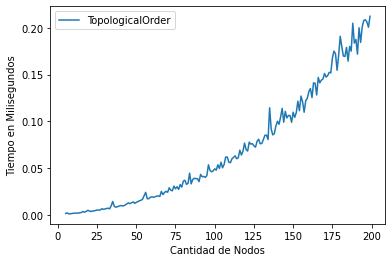

In [373]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

x=[]; y=[]
verbose = False
visualize = False

for n in range(5,200):
  z = repeat(setup="from __main__ import funcionEspecial", stmt=f"funcionEspecial({n})", repeat=1, number=10)
  x.append(n)
  y.append(z)

plt.plot(x,y)
plt.legend(["TopologicalOrder"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Tiempo en Milisegundos')
plt.show()

**Análisis**: La curva que describe el gráfico crece a medida la cantidad de nodos aumenta, presentando en ciertos casos un aumento excesivo del tiempo de ejecución.

**Explicación**: Esto se puede deber tanto a causas del procesador, como al grafo que se está analizando en la función. Como se indicó en el tiempo de ejecución, la complejidad de este algoritmo varía también según las conexiones que presente, y sabiendo que la cantidad de conexiones deriva entre $V-1$ y $V^2$, es posible que se generen mejores y peores casos.

---
### Comparación del Tiempo de Ejecución entre Iterativo y Recursivo:

El segundo experimento compara el tiempo de ejecución entre la variante del orden topológico que utiliza un DFS iterativo y la que usa un DFS recursivo.

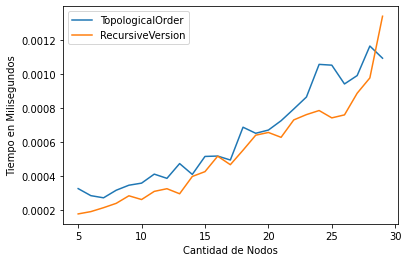

In [492]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

x=[]; y=[]
x1=[]; y1=[]
verbose = False
visualize = False

for n in range(5,30):
  z = repeat(setup="from __main__ import funcionEspecial", stmt=f"funcionEspecial({n})", repeat=1, number=1)
  w = repeat(setup="from __main__ import funcSpecial", stmt=f"funcSpecial({n})", repeat=1, number=1)
  x.append(n)
  x1.append(n)
  y.append(z)
  y1.append(w)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["TopologicalOrder", "RecursiveVersion"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Tiempo en Milisegundos')
plt.show()

**Análisis**: Ambas curvas muestran el mismo tipo de crecimiento, aunque la versión recursiva tarda en general un poco menos que su contraparte iterativa.

**Explicación**: Esto se puede deber a la estrategia utilizada en cada versión del algoritmo, la cual puede tener operaciones que se manejan con una mejor o peor optimización de tiempo. Sin embargo, ambas cumplen en general con su tiempo de ejecución esperado.